# TASK-1

In [4]:
#Importing required libraries
import gensim
import gensim
import multiprocessing
from gensim import models
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

## TRAINING DATA

In [7]:
with open(r'C:\Users\Ronisha Basker\Downloads\training_data.txt',encoding="utf-8",errors="ignore") as f:
    data4 = f.read()

In [10]:
data_train=data4

In [11]:
%%time
def read_input(input_file):
           
    with open(r'C:\Users\Ronisha Basker\Downloads\training_data.txt',encoding="utf-8",errors="ignore") as f:
         for i, line in enumerate (f):    
           
            # do some pre-processing and return a list of words for each review text
            #Convert a document into a list of lowercase tokens, ignoring tokens that are too short or too long
            yield gensim.utils.simple_preprocess (line)
#read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
documents = list (read_input (data_train))
#logging.info ("Done reading data file")

Wall time: 2.94 s


In [12]:
documents[0:1000]

[['definitely', 'brother', 'lockdown', 'housepay'],
 ['amp',
  'ca',
  'presents',
  'co',
  'vid',
  'based',
  'online',
  'tambo',
  'la',
  'ho',
  'us',
  'ie',
  'price',
  'rs',
  'per',
  'ticket',
  'rs',
  'contributed',
  'co',
  'vid',
  'relief',
  'fund',
  'date',
  'april',
  'pm',
  'rules',
  'cat',
  'ca',
  'member',
  'family',
  'persons',
  'allowed'],
 ['condolences',
  'family',
  'lost',
  'love',
  'one',
  'pandemic',
  'may',
  'god',
  'ease',
  'pain',
  'give',
  'peace',
  'comfo',
  'need'],
 ['president',
  'keeps',
  'talking',
  'much',
  'spend',
  'spend',
  'nearly',
  'much',
  'golf',
  'trips',
  'family',
  'business',
  'trips'],
 ['nobody',
  'recognize',
  'paradox',
  'rep',
  'ucl',
  'could',
  'ask',
  'question',
  'turkey',
  'brother',
  'helped',
  'fighting',
  'virus',
  'heard',
  'sent',
  'request',
  'get',
  'help',
  'dont',
  'worry',
  'turks',
  'always',
  'help',
  'people',
  'weak',
  'us'],
 ['father', 'older', 'er'

## Test Data

In [13]:
with open(r'C:\Users\Ronisha Basker\Downloads\word2vec-master\questions-words.txt',encoding="utf-8",errors="ignore") as f1:
    data_test = f1.read()

In [14]:
def read_input3(input_file):
    with open(r'C:\Users\Ronisha Basker\Downloads\word2vec-master\questions-words.txt',encoding="utf-8",errors="ignore") as f2:
         
         for i, line in enumerate (f2):    
            
            # do some pre-processing and return a list of words for each review text
            #Convert a document into a list of lowercase tokens, ignoring tokens that are too short or too long
            yield gensim.utils.simple_preprocess (line)
test = list(read_input3 (data_test)) 

In [15]:
test[0:1000]

[['capital', 'common', 'countries'],
 ['athens', 'greece', 'baghdad', 'iraq'],
 ['athens', 'greece', 'bangkok', 'thailand'],
 ['athens', 'greece', 'beijing', 'china'],
 ['athens', 'greece', 'berlin', 'germany'],
 ['athens', 'greece', 'bern', 'switzerland'],
 ['athens', 'greece', 'cairo', 'egypt'],
 ['athens', 'greece', 'canberra', 'australia'],
 ['athens', 'greece', 'hanoi', 'vietnam'],
 ['athens', 'greece', 'havana', 'cuba'],
 ['athens', 'greece', 'helsinki', 'finland'],
 ['athens', 'greece', 'islamabad', 'pakistan'],
 ['athens', 'greece', 'kabul', 'afghanistan'],
 ['athens', 'greece', 'london', 'england'],
 ['athens', 'greece', 'madrid', 'spain'],
 ['athens', 'greece', 'moscow', 'russia'],
 ['athens', 'greece', 'oslo', 'norway'],
 ['athens', 'greece', 'ottawa', 'canada'],
 ['athens', 'greece', 'paris', 'france'],
 ['athens', 'greece', 'rome', 'italy'],
 ['athens', 'greece', 'stockholm', 'sweden'],
 ['athens', 'greece', 'tehran', 'iran'],
 ['athens', 'greece', 'tokyo', 'japan'],
 ['ba

# Model

In [17]:
%%time
#Create word2vec model
import gensim
import multiprocessing
from gensim import models
from gensim.models import Word2Vec
cores = multiprocessing.cpu_count()
w2v_model = Word2Vec(min_count=25, #model ingnores words that do not meet minimum total frequency of words
                     window=29,    #Maximum distance between the current and predicted word within a sentence
                     size=300,     #Dimensionality of word vectors
                     sample=6e-5,  #threshold for figuring which higher frequency words are randomly down sampled
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)
w2v_model.build_vocab(documents, progress_per=10000)
w2v_model.train(documents, total_examples=w2v_model.corpus_count, epochs=10, report_delay=1)


Wall time: 36.6 s


(6837971, 13806130)

In [18]:
analogy_scores = w2v_model.wv.evaluate_word_analogies(r"C:\Users\Ronisha Basker\Downloads\word2vec-master\questions-words.txt")
print(analogy_scores[0])

0.07000795544948289


### Parameter tuning to find optimal value

In [237]:
%%time
#Parameters min_count, window and size are tuned, the computation time is 1 hour 40 mins
cores = multiprocessing.cpu_count()
min_count = [10,20,30,40,50]               
window = [10,20,30,40,50,60,70]
size = [300,400,500]
for i in min_count:
    for j in window:
        for k in size:
            w2v_model = Word2Vec(min_count=i, 
                        window=j,    
                        size=k, 
                        sample=6e-5,  
                        alpha=0.03, 
                        min_alpha=0.0007, 
                        negative=20,
                        workers=cores-1)
            w2v_model.build_vocab(documents, progress_per=10000)
            w2v_model.train(documents, total_examples=w2v_model.corpus_count, epochs=10, report_delay=1)

        
            analogy_scores = w2v_model.wv.evaluate_word_analogies(r"C:\Users\Ronisha Basker\Downloads\word2vec-master\questions-words.txt")
            print(analogy_scores[0])



0.04852269997597886
0.05164544799423493
0.05284650492433341
0.05572904155656978
0.057170309872687966
0.0540475618544319
0.05813115541676676
0.05813115541676676
0.055488830170550084
0.055248618784530384
0.055969252942589476
0.056689887100648574
0.057170309872687966
0.05885178957482585
0.0540475618544319
0.056209464328609175
0.05885178957482585
0.05260629353831372
0.057170309872687966
0.050204179678116745
0.0542877732404516
0.07095926412614981
0.0726018396846255
0.07030223390275953
0.07194480946123522
0.0735873850197109
0.0735873850197109
0.07588699080157688
0.07391590013140605
0.07917214191852825
0.07424441524310119
0.07095926412614981
0.07588699080157688
0.07720105124835742
0.07654402102496714
0.07030223390275953
0.07457293035479633
0.06767411300919843
0.07095926412614981
0.07325886990801576
0.0726018396846255
0.0726018396846255
0.07158165452207459
0.07201028718388341
0.06943849121303043
0.07158165452207459
0.06729532790398629
0.06729532790398629
0.06600942991855979
0.0732961851693099


### Function to find words that are similar in both test and train

In [19]:
def similar(list):
    test_list= []
    for i in list:
        try:
           
            a,b,c = i[0],i[1],i[2]
            result = w2v_model.most_similar(positive=[a,c], negative=[b],topn=1)
            end = [(a,b,c)]+result
            test_list.append(end)    
        except:
            pass
    return test_list
store = similar(test)
store.sort(key=lambda x:x[1][1],reverse=True)
store
store[:20] #Prinitng top 20, sorted according to score

E:\python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


[[('damascus', 'syria', 'kiev'), ('radioactive', 0.9877556562423706)],
 [('gaborone', 'botswana', 'kiev'), ('evacuated', 0.9863565564155579)],
 [('damascus', 'syria', 'lisbon'), ('quieter', 0.9803868532180786)],
 [('gaborone', 'botswana', 'lisbon'), ('quieter', 0.9784215688705444)],
 [('gaborone', 'botswana', 'lima'), ('perun', 0.9778370261192322)],
 [('gaborone', 'botswana', 'nicosia'), ('mediterranean', 0.9777263402938843)],
 [('damascus', 'syria', 'lima'), ('perun', 0.9769250154495239)],
 [('damascus', 'syria', 'gaborone'), ('botswana', 0.9733522534370422)],
 [('lima', 'peru', 'lisbon'), ('quieter', 0.9728764891624451)],
 [('damascus', 'syria', 'hanoi'), ('hectic', 0.9716968536376953)],
 [('gaborone', 'botswana', 'hanoi'), ('hectic', 0.9640681147575378)],
 [('lima', 'peru', 'nicosia'), ('mediterranean', 0.9614540338516235)],
 [('kigali', 'rwanda', 'lima'), ('perun', 0.9557864665985107)],
 [('gaborone', 'botswana', 'madrid'), ('barcelona', 0.953472375869751)],
 [('kigali', 'rwanda', 

In [25]:
#function that return prediction for c given a and b
def find1(first,second,third):
    a,b,c = first,second,third
    result = w2v_model.most_similar(positive=[a,c], negative=[b],topn=1)
    return [(a,b,c)]+result


### Testing Analogies

In [36]:
#predicting for 'c', given 'a' and 'b'
a=['father', 'king','china','korea','bangkok','joe','corona','gun','truth']
b=['brother','queen','beijing','seoul','thailand','biden','virus','shoot','child']
c=['mother','man','bangkok','india','israel','trump','health','girl','garden']

for i, j, k in zip(x, y, z):
    print(find1(i,j,k))

[('father', 'brother', 'mother'), ('child', 0.5160696506500244)]
[('king', 'queen', 'man'), ('trump', 0.44766369462013245)]
[('china', 'beijing', 'bangkok'), ('thailand', 0.5703688859939575)]
[('korea', 'seoul', 'india'), ('mumbai', 0.5949628353118896)]
[('bangkok', 'thailand', 'israel'), ('palestine', 0.6215420961380005)]
[('joe', 'biden', 'trump'), ('america', 0.514342725276947)]
[('corona', 'virus', 'health'), ('co', 0.46248120069503784)]
[('gun', 'shoot', 'girl'), ('dawg', 0.5114200115203857)]
[('truth', 'child', 'garden'), ('tea', 0.46232542395591736)]


E:\python\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in w2v_model.wv.vocab:
        tokens.append(w2v_model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

E:\python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


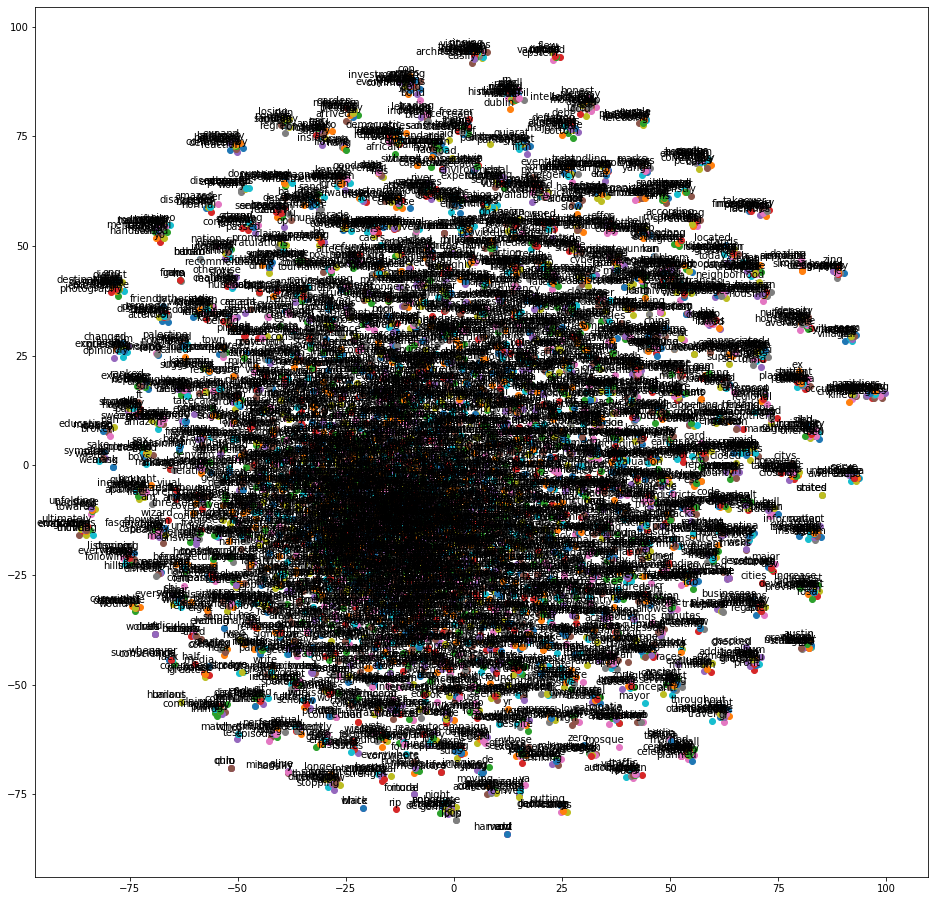

In [30]:
tsne_plot(w2v_model)